# NIFTY Rolling Sharpe and Sortino Ratios

In the realm of investment, gauging performance and risk is paramount. Two metrics stand out for their effectiveness in measuring the risk-adjusted returns of an investment: the Sharpe ratio and the Sortino ratio. When applied on a rolling basis, these ratios provide a dynamic and nuanced view of an investment’s performance over time

#### The Sharpe Ratio: Balancing Risk and Reward
The Sharpe ratio, developed by Nobel laureate William F. Sharpe, measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It’s a simple yet powerful way to understand whether the returns of an investment are due to smart decision-making or a result of taking on excessive risk.

#### The Rolling Sharpe Ratio: A Dynamic Perspective
While the traditional Sharpe ratio gives a single snapshot, the rolling Sharpe ratio provides a moving picture, recalculating the ratio over a fixed period as new data comes in. This rolling calculation offers a more immediate and ongoing analysis of the risk-adjusted performance, allowing investors to spot trends, volatility, and the impact of market events on investment returns.

#### The Sortino Ratio: Focusing on Downside Risk
The Sortino ratio modifies the Sharpe ratio by considering only downside volatility. This is particularly useful for investors who are more concerned about the potential for losses than the volatility from upside gains.

#### The Rolling Sortino Ratio: Timely Insights on Downside Exposure
Similar to the rolling Sharpe, the rolling Sortino ratio provides an evolving measure of downside risk. By focusing on the negative fluctuations in investment returns, investors can get a clearer understanding of how often and how severely their investments are losing value.

[*********************100%%**********************]  1 of 1 completed


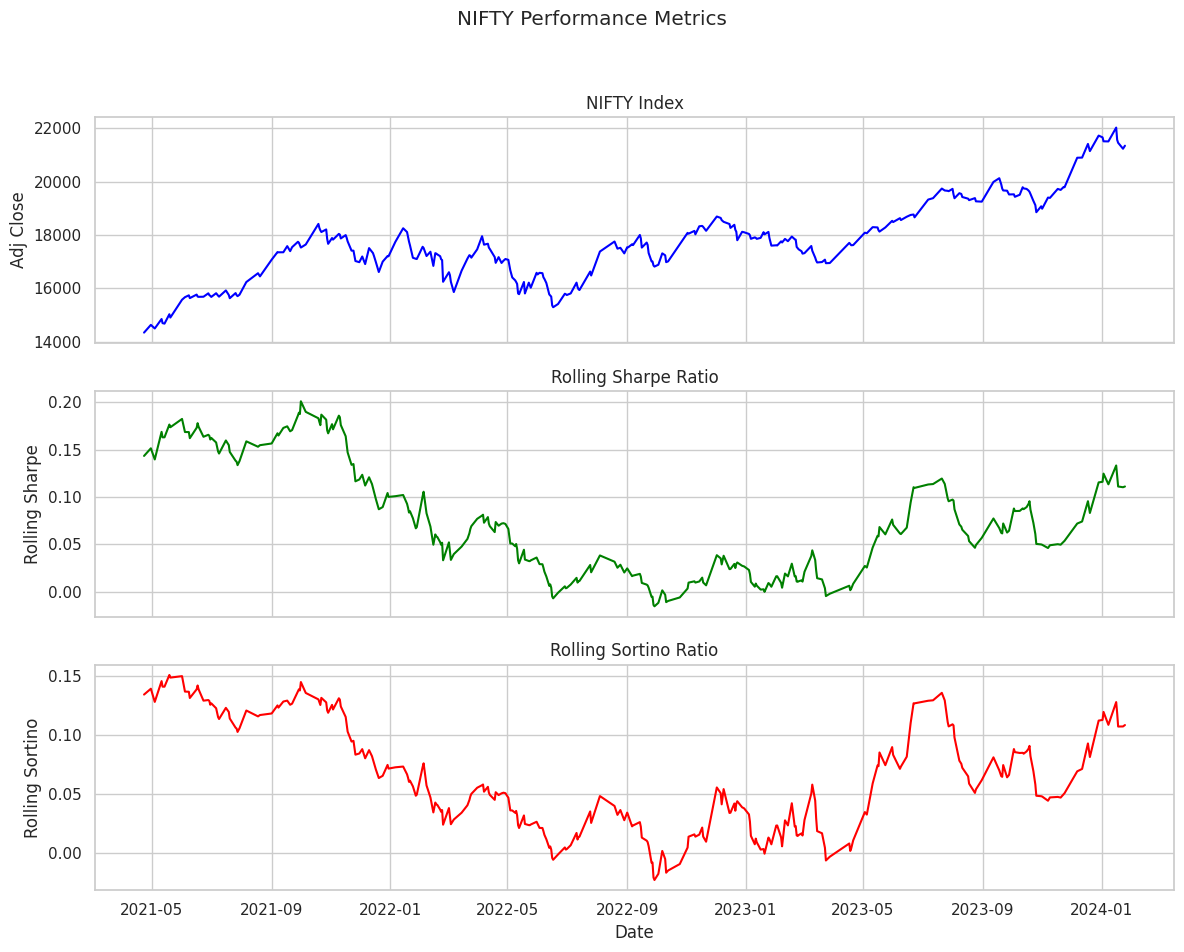

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch NIFTY data
nifty = yf.download('^NSEI', start='2019-01-01')

# Calculate daily returns
nifty['Daily Return'] = nifty['Adj Close'].pct_change()

# Define the rolling window
rolling_window = 252  # assuming 252 trading days in a year

# Calculate Rolling Sharpe Ratio assuming risk-free rate is zero
# (Change '0' to your desired annualized risk-free interest rate)
risk_free_rate = 0.0
nifty['Rolling Sharpe'] = (nifty['Daily Return'].rolling(window=rolling_window).mean() - risk_free_rate) / nifty['Daily Return'].rolling(window=rolling_window).std()

# Calculate daily return downside deviation for Sortino Ratio
negative_returns = nifty['Daily Return'][nifty['Daily Return'] < 0]
nifty['Downside Deviation'] = negative_returns.rolling(window=rolling_window).std()

# Calculate Rolling Sortino Ratio
nifty['Rolling Sortino'] = (nifty['Daily Return'].rolling(window=rolling_window).mean() - risk_free_rate) / nifty['Downside Deviation']

# Drop NaN values from the dataframe to avoid issues during plotting
nifty.dropna(inplace=True)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot Nifty Index
sns.lineplot(ax=axes[0], data=nifty, x=nifty.index, y='Adj Close', color='blue').set_title('NIFTY Index')

# Plot Rolling Sharpe Ratio
sns.lineplot(ax=axes[1], data=nifty, x=nifty.index, y='Rolling Sharpe', color='green').set_title('Rolling Sharpe Ratio')

# Plot Rolling Sortino Ratio
sns.lineplot(ax=axes[2], data=nifty, x=nifty.index, y='Rolling Sortino',color='red').set_title('Rolling Sortino Ratio')

# Set the title for the entire figure
plt.suptitle("NIFTY Performance Metrics")

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()
